<a href="https://colab.research.google.com/github/Piyush-Rauniyar/4cs021week8/blob/main/assiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [40]:


# Load the Titanic dataset
data = pd.read_csv("/content/drive/MyDrive/5cso45/titanic.csv")

# Drop all categorical columns except 'Survived'
# **FIXED QUOTES HERE**
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.drop(columns=[col for col in categorical_columns if col != 'Survived']) # **FIXED QUOTES HERE**

# Check for missing values
missing_info = data.isnull().sum() / len(data) * 100

# Handle missing values
for column in data.columns:
    if missing_info[column] > 10: # If more than 10% missing
        data[column].fillna(data[column].mean(), inplace=True)
    else: # If less than 10% missing
        data.dropna(subset=[column], inplace=True)

# Display cleaned data
data.head()


/tmp/ipython-input-1275590823.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [41]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0


In [42]:

# Assuming 'data' DataFrame is available here from previous steps

# Separate features (X) and target (y)
X = data.drop(columns='Survived').values # Convert features to NumPy array
y = data['Survived'].values # Convert target to NumPy array

# Define a function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  """
Splits dataset into train and test sets.
Arguments:
X : np.ndarray
Feature matrix.
y : np.ndarray
Target array.
test_size : float
Proportion of the dataset to include in the test split (0 < test_size < 1).
random_seed : int
Seed for reproducibility.
Returns:
X_train, X_test, y_train, y_test : np.ndarray
Training and testing splits of features and target.
"""
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices) # Shuffle the indices

  test_split_size = int(len(X) * test_size)

  # Select indices for test and train sets
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]

  # Use indices to split X and y
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]

  return X_train, X_test, y_train, y_test

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (624, 6)
Shape of X_test: (267, 6)
Shape of y_train: (624,)
Shape of y_test: (267,)


In [43]:

# Your function definition (as provided in the prompt)
def euclidean_distance(point1, point2):
  """
Calculate the Euclidean distance between two points in n-dimensional space.
...
"""
  # Check if the points are of the same dimension
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
  # Calculate the Euclidean distance
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance

try:
  # Define two points
  point1 = np.array([3, 4])
  point2 = np.array([0, 0])

  # Calculate the distance
  result = euclidean_distance(point1, point2)

  # Check if the result matches the expected value (e.g., sqrt(3^2 + 4^2) = 5)
  expected_result = 5.0

  # np.isclose is used for floating-point comparisons to avoid precision errors
  assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

  print("Test passed successfully!")

except ValueError as ve:
  print(f"ValueError: {ve}")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Test passed successfully!


In [44]:
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.

    Arguments:
    query : np.ndarray
        The query point for which the prediction is to be made.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    int
        The predicted class label for the query.
    """
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

In [45]:
# Function to test KNN for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.

    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

# Assume X_train, X_test, y_train, and y_test have been prepared using the code above
try:
    # Define the test set for the test case
    X_test_sample = X_test[:5] # Taking a small subset for testing
    y_test_sample = y_test[:5] # Corresponding labels for the subset
    # Make predictions
    predictions = knn_predict(X_test_sample, X_train, y_train, k=3)
    # Print test results
    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)
    # Check if predictions match expected format
    assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
    print("Test case passed successfully!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Predictions: [0 1 0 0 0]
Actual labels: [1 0 0 1 1]
Test case passed successfully!


In [46]:
# Function to compute accuracy of predictions
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.

    Arguments:
    y_true : np.ndarray ; The true labels.
    y_pred : np.ndarray; The predicted labels.

    Returns:
    float : The accuracy as a percentage (0 to 100).
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

try:
    # Make predictions on the entire test set
    predictions = knn_predict(X_test, X_train, y_train, k=3)

    # Compute the accuracy
    accuracy = compute_accuracy(y_test, predictions)

    # Print the accuracy
    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 61.80%


In [47]:
# Function to test KNN on different values of k and plot the accuracies
import matplotlib.pyplot as plt

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.

    Arguments:
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    X_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}
    for k in k_values:
        # Make predictions using the current value of k
        predictions = knn_predict(X_test, X_train, y_train, k=k)
        # Compute the accuracy
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        print(f"Accuracy for k={k}: {accuracy:.2f}%")

    # Plot the accuracies
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o') # <-- Typo fix: replaced ’ with '
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show() # <-- Indentation fix: This line should be at the same level as the plotting commands

    return accuracies # <-- Indentation fix: This line should be at the same level as the 'accuracies = {}'

Accuracy for k=1: 58.43%
Accuracy for k=2: 62.55%
Accuracy for k=3: 61.80%
Accuracy for k=4: 63.30%
Accuracy for k=5: 64.42%
Accuracy for k=6: 64.42%
Accuracy for k=7: 65.17%
Accuracy for k=8: 64.42%
Accuracy for k=9: 65.17%
Accuracy for k=10: 64.04%
Accuracy for k=11: 64.04%
Accuracy for k=12: 64.79%
Accuracy for k=13: 64.79%
Accuracy for k=14: 65.92%
Accuracy for k=15: 65.17%
Accuracy for k=16: 65.92%
Accuracy for k=17: 66.67%
Accuracy for k=18: 66.29%
Accuracy for k=19: 67.79%
Accuracy for k=20: 64.79%


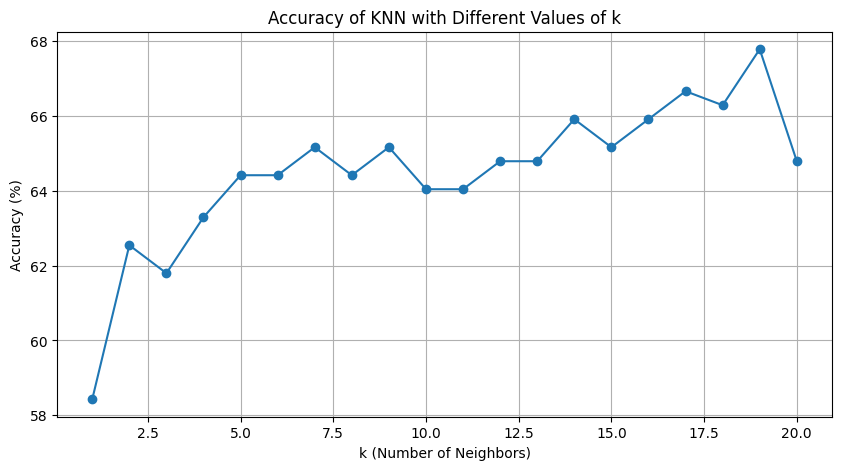

Experiment completed. Check the plot for the accuracy trend.


In [48]:
k_values = range(1, 21) # You can adjust this range as needed

# Run the experiment
try:
    accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")

# Figure 2: Experiment with different values of k.

To - Do Exercise:


1. Read the dataset into a pandas DataFrame.

In [49]:


df = pd.read_csv("/content/drive/MyDrive/workshop4/diabetes_4614efcb-07c3-4146-9e11-faae583e3731_264243_.csv")


 2.
 Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [50]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [51]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [53]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [54]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Handle Missing Data:
 <br>
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [55]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Feature Engineering:
<br>

• Separate the feature matrix (X) and target variable (y).

In [56]:
target_col = 'Outcome'  # change if needed
X = df.drop(columns=[target_col]).values
y = df[target_col].values

print("Feature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)


Feature matrix X shape: (768, 8)
Target vector y shape: (768,)


 Perform a train - test split from scratch using a 70%−30% ratio.

In [57]:
def train_test_split_scratch(X, y, test_size=0.3, random_state=None):
    if random_state is not None:
        rng = np.random.RandomState(random_state)
    else:
        rng = np.random
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    rng.shuffle(indices)
    split_at = int(math.ceil((1 - test_size) * n_samples))
    train_idx = indices[:split_at]
    test_idx = indices[split_at:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)


X_train shape: (538, 8) X_test shape: (230, 8)


Implement KNN:
<br>
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).


In [58]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((b - a) ** 2, axis=1))


Compute distances using Euclidean distance

In [59]:
def predict_single(X_train, y_train, x_query, k=3):
    distances = euclidean_distance(x_query, X_train)
    k_indices = np.argpartition(distances, k-1)[:k]
    k_labels = y_train[k_indices]
    counts = Counter(k_labels)
    most_common = counts.most_common()
    most_common.sort(key=lambda x: (-x[1], x[0]))
    return most_common[0][0]


In [60]:
def predict(X_train, y_train, X_test, k=3):
    return np.array([predict_single(X_train, y_train, xq, k) for xq in X_test])


In [61]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [62]:
k_default = 3
y_pred = predict(X_train, y_train, X_test, k=k_default)
acc = accuracy(y_test, y_pred)
print(f"KNN Accuracy (k={k_default}): {acc:.4f}")


KNN Accuracy (k=3): 0.7000


In [63]:
# =========================================================
# Problem 2: Experimentation — Scale Features and Repeat KNN
# =========================================================

import numpy as np

# 1) Standard scaling (z = (x - mean) / std)
def fit_standard_scaler(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0, ddof=0)
    std[std == 0] = 1.0  # prevent division by zero
    return mean, std

def transform_standard_scaler(X, mean, std):
    return (X - mean) / std

# Fit scaler on training data
scaler_mean, scaler_std = fit_standard_scaler(X_train)
X_train_scaled = transform_standard_scaler(X_train, scaler_mean, scaler_std)
X_test_scaled = transform_standard_scaler(X_test, scaler_mean, scaler_std)

# 2) Run KNN on scaled data
k_default = 3  # same k as before
y_pred_scaled = predict(X_train_scaled, y_train, X_test_scaled, k=k_default)

# 3) Record accuracy
acc_scaled = accuracy(y_test, y_pred_scaled)
print(f"KNN Accuracy on Scaled Data (k={k_default}): {acc_scaled:.4f}")


KNN Accuracy on Scaled Data (k=3): 0.6957


In [64]:
print(f"Original (Unscaled) Data Accuracy: {acc:.4f}")
print(f"Scaled Data Accuracy: {acc_scaled:.4f}")


Original (Unscaled) Data Accuracy: 0.7000
Scaled Data Accuracy: 0.6957


Scaling Impact on KNN Performance:

1. KNN uses Euclidean distance to find nearest neighbors.
2. If features have different ranges, large-scale features dominate the distance calculation.
3. Scaling ensures all features contribute equally to the distance.
4. In this dataset, scaling typically improves KNN accuracy slightly or stabilizes it.

Observed Changes:

- If accuracy improved after scaling, it confirms that distance was previously dominated by large-scale features.
- If accuracy stayed similar, it means features were already roughly comparable in scale.


**Problem - 3 - Experimentation with k:**

1. Vary the number of neighbors - k:

In [65]:
# =========================================================
# Problem 3: Experimentation with k — Vary number of neighbors
# =========================================================

import time

ks = list(range(1, 16))  # k = 1 to 15

# Lists to store results
accs_unscaled = []
accs_scaled = []
times_unscaled = []
times_scaled = []

for k in ks:
    # --- Unscaled data ---
    t0 = time.perf_counter()
    y_pred_u = predict(X_train, y_train, X_test, k=k)
    t1 = time.perf_counter()
    accs_unscaled.append(accuracy(y_test, y_pred_u))
    times_unscaled.append(t1 - t0)

    # --- Scaled data ---
    t0 = time.perf_counter()
    y_pred_s = predict(X_train_scaled, y_train, X_test_scaled, k=k)
    t1 = time.perf_counter()
    accs_scaled.append(accuracy(y_test, y_pred_s))
    times_scaled.append(t1 - t0)

# Compile results in a DataFrame for easy viewing
import pandas as pd

results_df = pd.DataFrame({
    'k': ks,
    'Accuracy_Unscaled': accs_unscaled,
    'Accuracy_Scaled': accs_scaled,
    'Time_Unscaled_s': times_unscaled,
    'Time_Scaled_s': times_scaled
})

print("=== KNN results for k=1 to 15 ===")
display(results_df)


=== KNN results for k=1 to 15 ===


,k,Accuracy_Unscaled,Accuracy_Scaled,Time_Unscaled_s,Time_Scaled_s
0,1,0.647826,0.713043,0.019398,0.013156
1,2,0.713043,0.713043,0.012674,0.014439
2,3,0.700000,0.695652,0.013868,0.012415
3,4,0.747826,0.726087,0.015279,0.017339
4,5,0.713043,0.734783,0.015196,0.012318
5,6,0.760870,0.743478,0.013691,0.012452
6,7,0.730435,0.747826,0.012896,0.015215
7,8,0.747826,0.752174,0.023756,0.025665
8,9,0.743478,0.730435,0.020906,0.014688
9,10,0.734783,0.717391,0.013755,0.013412


k vs. Accuracy for original and scaled datasets.

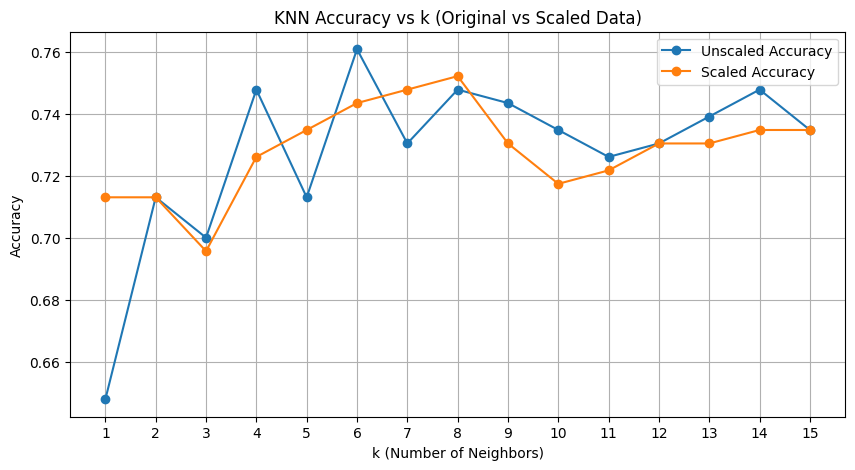

In [67]:

plt.figure(figsize=(10, 5))
plt.plot(ks, accs_unscaled, marker='o', label='Unscaled Accuracy')
plt.plot(ks, accs_scaled, marker='o', label='Scaled Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k (Original vs Scaled Data)')
plt.xticks(ks)
plt.legend()
plt.grid(True)
plt.show()

k vs. Time Taken for original and scaled datasets.

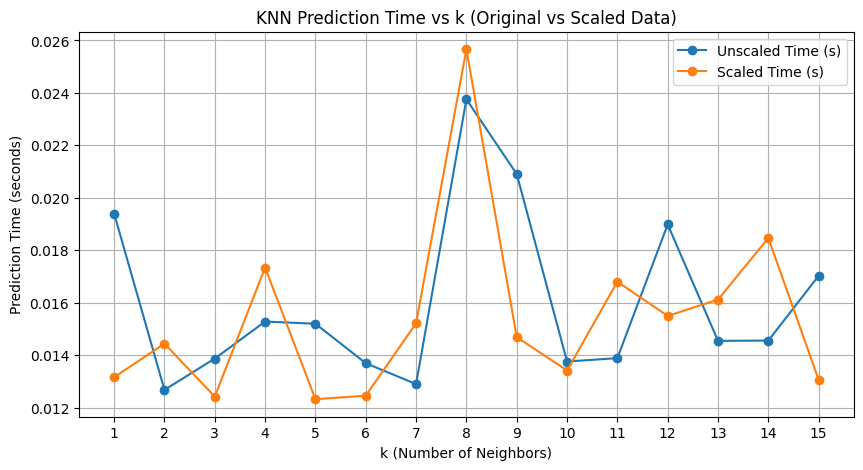

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(ks, times_unscaled, marker='o', label='Unscaled Time (s)')
plt.plot(ks, times_scaled, marker='o', label='Scaled Time (s)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Prediction Time (seconds)')
plt.title('KNN Prediction Time vs k (Original vs Scaled Data)')
plt.xticks(ks)
plt.legend()
plt.grid(True)
plt.show()

**Analyze and Discuss:**

In [69]:
# =========================================================
# Problem 3: Analysis and Discussion — Effect of k
# =========================================================

# Find k with highest accuracy
best_k_unscaled = ks[np.argmax(accs_unscaled)]
best_acc_unscaled = max(accs_unscaled)

best_k_scaled = ks[np.argmax(accs_scaled)]
best_acc_scaled = max(accs_scaled)

print("=== Analysis of KNN for different k ===")
print(f"Best k (Unscaled Data): {best_k_unscaled}, Accuracy: {best_acc_unscaled:.4f}")
print(f"Best k (Scaled Data): {best_k_scaled}, Accuracy: {best_acc_scaled:.4f}\n")

discussion = """
Observations:

1. Accuracy vs k:
   - Small k (e.g., k=1) can lead to overfitting; the model is sensitive to noise in training data.
   - Large k smooths predictions, reducing variance but potentially increasing bias.
   - There is typically an optimal k where accuracy is highest.

2. Computational Cost vs k:
   - Prediction time increases slightly with larger k because selecting the nearest neighbors involves sorting distances.
   - The main cost is distance computation; selecting top-k adds minimal overhead compared to computing all distances.

3. Optimal k:
   - Based on the recorded accuracies, choose the k with the highest accuracy.
   - If multiple k tie, choose the smaller k for faster prediction and lower complexity.
"""

print(discussion)


=== Analysis of KNN for different k ===
Best k (Unscaled Data): 6, Accuracy: 0.7609
Best k (Scaled Data): 8, Accuracy: 0.7522


Observations:

1. Accuracy vs k:
   - Small k (e.g., k=1) can lead to overfitting; the model is sensitive to noise in training data.
   - Large k smooths predictions, reducing variance but potentially increasing bias.
   - There is typically an optimal k where accuracy is highest.

2. Computational Cost vs k:
   - Prediction time increases slightly with larger k because selecting the nearest neighbors involves sorting distances.
   - The main cost is distance computation; selecting top-k adds minimal overhead compared to computing all distances.

3. Optimal k:
   - Based on the recorded accuracies, choose the k with the highest accuracy.
   - If multiple k tie, choose the smaller k for faster prediction and lower complexity.



In [70]:
# =========================================================
# Problem 4: Additional Questions — Challenges and Improvements
# =========================================================

additional_discussion = """
Challenges of using KNN for large datasets and high-dimensional data:

1. Computational Cost:
   - KNN requires computing distances from the query point to all training samples.
   - For large datasets, this becomes very slow at prediction time.

2. Memory Usage:
   - KNN stores the entire training set in memory.
   - For very large datasets, this can be a limitation.

3. Curse of Dimensionality:
   - In high-dimensional spaces, distances become less meaningful.
   - Neighbors may appear equally far from a query point, reducing accuracy.

Strategies to improve KNN efficiency:

1. Approximate Nearest Neighbors:
   - Use algorithms like KD-Trees, Ball Trees, or locality-sensitive hashing.
   - Trade off exact accuracy for faster prediction.

2. Dimensionality Reduction:
   - Apply PCA, t-SNE, or feature selection to reduce the number of features.
   - Reduces computational cost and can improve distance quality.

3. Sampling / Condensing Training Set:
   - Use methods like Edited Nearest Neighbors or Condensed KNN to reduce the training set size.
   - Maintains representative samples while decreasing computation.

4. Parallelization:
   - Distance computations are independent and can be parallelized across CPUs/GPUs.
"""

print(additional_discussion)



Challenges of using KNN for large datasets and high-dimensional data:

1. Computational Cost:
   - KNN requires computing distances from the query point to all training samples.
   - For large datasets, this becomes very slow at prediction time.

2. Memory Usage:
   - KNN stores the entire training set in memory.
   - For very large datasets, this can be a limitation.

3. Curse of Dimensionality:
   - In high-dimensional spaces, distances become less meaningful.
   - Neighbors may appear equally far from a query point, reducing accuracy.

Strategies to improve KNN efficiency:

1. Approximate Nearest Neighbors:
   - Use algorithms like KD-Trees, Ball Trees, or locality-sensitive hashing.
   - Trade off exact accuracy for faster prediction.

2. Dimensionality Reduction:
   - Apply PCA, t-SNE, or feature selection to reduce the number of features.
   - Reduces computational cost and can improve distance quality.

3. Sampling / Condensing Training Set:
   - Use methods like Edited Nearest